Exercise 1   Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [6]:
import nsfg

In [7]:
data = nsfg.ReadFemPreg()

In [10]:
data.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [17]:
live = data[data.outcome==1]
final = live[['totalwgt_lb','agepreg']]

In [21]:
final.isnull().sum()

totalwgt_lb    110
agepreg          0
dtype: int64

In [22]:
final = final.dropna()

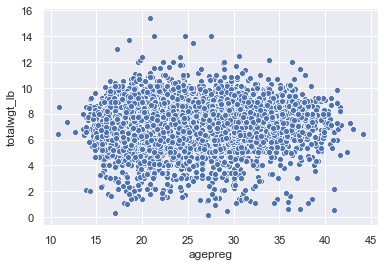

In [24]:
sns.scatterplot(x='agepreg',y='totalwgt_lb',data=final)

In [25]:
from scipy import stats

In [27]:
weights = final.totalwgt_lb
wgt_percentile = [stats.percentileofscore(weights,x) for x in weights]
final['wgt_percentile'] = wgt_percentile

<ipython-input-27-d553224e26b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['wgt_percentile'] = wgt_percentile


In [28]:
final

,totalwgt_lb,agepreg,wgt_percentile
0,8.8125,33.16,88.957734
1,7.8750,39.25,68.095818
2,9.1250,14.33,93.151140
3,7.0000,17.83,38.526223
4,6.1875,18.33,17.360035
...,...,...,...
13581,6.3750,30.66,21.741536
13584,6.3750,26.91,21.741536
13588,6.1875,17.91,17.360035
13591,7.5000,21.58,56.090949


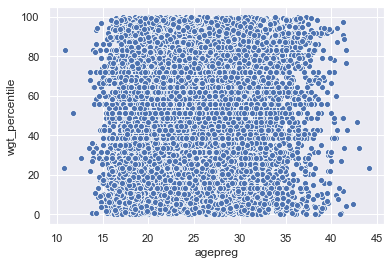

In [29]:
sns.scatterplot(x='agepreg',y='wgt_percentile',data=final)

In [32]:
# Pearson's coefficient
ages = final.agepreg
np.corrcoef(ages,weights)

array([[1.        , 0.06883397],
       [0.06883397, 1.        ]])

In [34]:
# Spearmsn's coefficient
final.corr(method='spearman')

,totalwgt_lb,agepreg,wgt_percentile
totalwgt_lb,1.00000,0.09461,1.00000
agepreg,0.09461,1.00000,0.09461
wgt_percentile,1.00000,0.09461,1.00000


Since Spearman's coefficient is higher than Pearson's coefficient, this indicates that either one of the variables has a skewed distribution, or the relationship is nonlinear, or both.

In [35]:
stats.skew(ages)

0.42246413492050394

In [37]:
stats.skew(weights)

-0.5895062687577698

(array([  19.,  589., 1821., 1964., 1746., 1394.,  933.,  419.,  134.,
          19.]),
 array([10.83 , 14.155, 17.48 , 20.805, 24.13 , 27.455, 30.78 , 34.105,
        37.43 , 40.755, 44.08 ]),
 <a list of 10 Patch objects>)

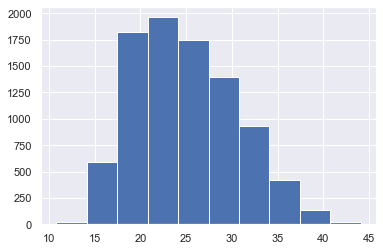

In [38]:
plt.hist(ages)

(array([3.800e+01, 9.500e+01, 2.440e+02, 1.257e+03, 4.295e+03, 2.604e+03,
        4.580e+02, 3.700e+01, 6.000e+00, 4.000e+00]),
 array([ 0.125  ,  1.65625,  3.1875 ,  4.71875,  6.25   ,  7.78125,
         9.3125 , 10.84375, 12.375  , 13.90625, 15.4375 ]),
 <a list of 10 Patch objects>)

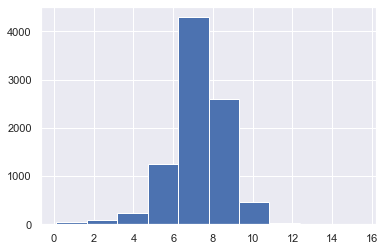

In [39]:
plt.hist(weights)

In [40]:
np.corrcoef(np.log(ages),weights)

array([[1.        , 0.07416024],
       [0.07416024, 1.        ]])

Summary: I would characterize the relationship between mother age at birth and baby birth weight as virtually no relationship, because the correlation coefficients are near zero.